Trying to figure out what the issue is with the stability case

In [1]:
import os
#Specify whether to use CHEESEHEAD or synthtic data 
os.environ['config'] = 'CHEESEHEAD'
# os.environ['config'] = 'synthetic'

#Import setup module
from setup import* 
from chad_funcs import *

import fsspec
import xarray as xr
import geopandas as gpd 
import geodatasets
import contextily as cx

#If using limited cases- full case list read in through setup module
cases = pd.read_csv('../Inputs/cases_limited.csv', index_col = 'case') #dataframe of tower coordinates

In [2]:
startdate = dt.datetime(2019, 6, 20)
enddate = dt.datetime(2019, 10, 13, 23, 30)
dtindex = readdata('dtindex', startdate, enddate)
hh_index = np.arange(0, 24, 0.5) #half-hourly index

In [3]:
# E_budget = pd.read_pickle(input_filepath + 'Cons_input_data/E_budget.pickle')

filepath = output_filepath + 'adv_final/H_hrz_all_lai.pickle'
H_hrz = pd.read_pickle(filepath)

filepath = output_filepath + 'adv_final/LE_hrz_all_lai.pickle'
LE_hrz = pd.read_pickle(filepath)

In [4]:
H_A = H_hrz['A']
H_B = H_hrz['B']
LE_A = LE_hrz['A']
LE_B = LE_hrz['B']

MO = readdata('MO', startdate, enddate)


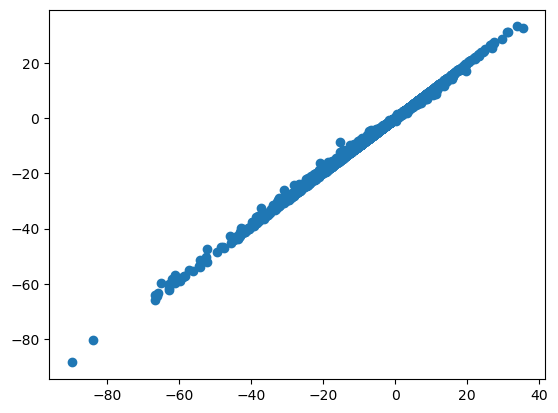

In [5]:
tow = 'PFj'
plt.scatter(LE_A[tow], LE_B[tow])

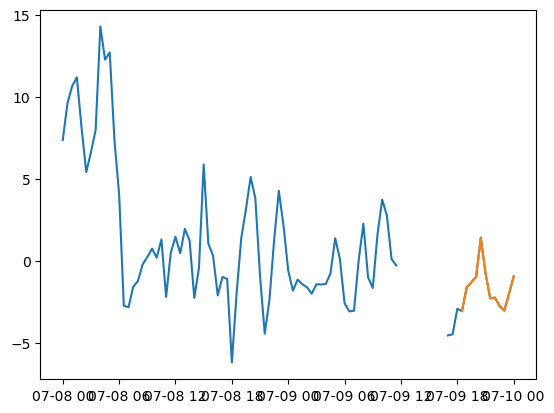

In [6]:
startdate = dt.datetime(2019, 7, 8)
enddate = dt.datetime(2019, 7, 10)
tow = 'PFb'
plt.plot(H_A[tow][startdate:enddate])
plt.plot(H_B[tow][startdate:enddate])
# plt.plot(MO[tow][startdate:enddate])

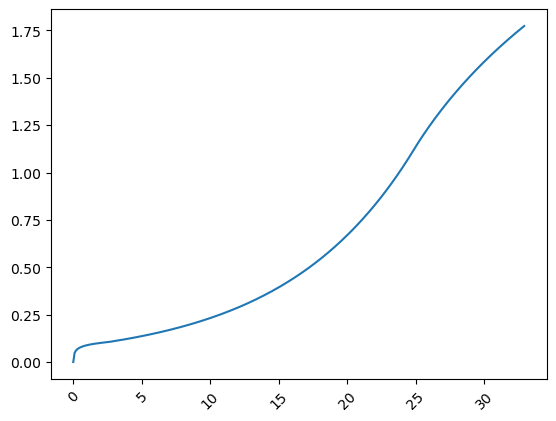

In [10]:
# startdate = dt.datetime(2019, 7, 8)
# enddate = dt.datetime(2019, 7, 15)
startdate = dt.datetime(2019, 6, 20, 0)
enddate = dt.datetime(2019, 10, 13, 23)
tow = 'PFb'
WS_use =  readdata('hrz_wind', startdate, enddate)['WS_top'][tow]
stab_meth = 'Benoit'
z = 10
z0 = 0.1*tc.loc[tow, 'veg_h']
MO_tow = MO[tow]
plt.plot(wind_prof(tow, stab_meth, WS_use, MO_tow, dtindex, step = 0.1, z_Umes = 'use_mes').iloc[1500])
# plt.plot(wind_prof(tow, stab_meth, WS_use, MO_tow, dtindex, step = 0.1, z_Umes = 'use_mes')[30])#[cutstart:cutend])
plt.xticks(rotation = 45);

In [8]:
#Read in horizontal gradient for a particular case
startdate = dt.datetime(2019, 6, 20, 0)
enddate = dt.datetime(2019, 10, 13, 23)
case = 'B'
grad_method = cases['grad_method'].loc[case]
interpdist = cases['interp_dist'].loc[case]
interpdir = cases['interp_dir'].loc[case]
stab_meth = cases['stability'].loc[case]
kernel = cases['interp_kernel'].loc[case]

# # Filepath for shortened time
filepath = intermed_filepath + 'hrz_gradients/tracer' + grad_method + str(interpdist) + str(interpdir) \
    + str(kernel) +str(stab_meth) + startdate.strftime("%m%d")+ '-'+ enddate.strftime("%m%d")+'.pickle'
    

with open(filepath, 'rb') as handle:
    hrz_grad = pickle.load(handle)

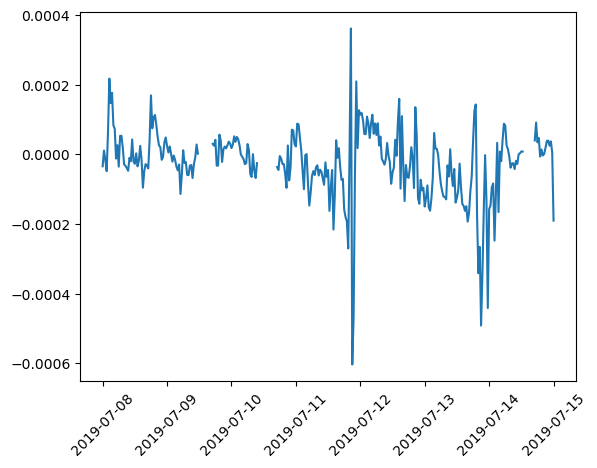

In [9]:
#Plot horizontal gradients (to see if they're zero)
cutstart = dt.datetime(2019, 7, 8)
cutend = dt.datetime(2019, 7, 15)
var = 'TA'
lev = 30
plt.plot(hrz_grad[var, lev, 'PFb'][cutstart:cutend])
plt.xticks(rotation = 45);